About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Download the [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

In [6]:
df = pd.read_csv('heart_disease_uci.csv')
df.sample(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
115,116,41,Male,Cleveland,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,0.0,fixed defect,0
791,792,57,Male,VA Long Beach,asymptomatic,140.0,214.0,False,st-t abnormality,144.0,True,2.0,flat,NaN,fixed defect,2
91,92,62,Female,Cleveland,asymptomatic,160.0,164.0,False,lv hypertrophy,145.0,False,6.2,downsloping,3.0,reversable defect,3
41,42,40,Male,Cleveland,typical angina,140.0,199.0,False,normal,178.0,True,1.4,upsloping,0.0,reversable defect,0


# Task 1 (2 points)

Compute the mean, quartiles(Q1, Q2, Q3) and std for every numerical feature (also include column `'id'`).

In [12]:
df['id'].quantile(0.25)

230.75

In [13]:
id_quantiles = df['id'].quantile([0.25, 0.5, 0.75])
print(id_quantiles)

0.25    230.75
0.50    460.50
0.75    690.25
Name: id, dtype: float64


In [15]:
age_quantiles = df['age'].quantile([0.25, 0.5, 0.75])
print(age_quantiles)

0.25    47.0
0.50    54.0
0.75    60.0
Name: age, dtype: float64


In [14]:
trestbps_quantiles = df['trestbps'].quantile([0.25, 0.5, 0.75])
print(trestbps_quantiles)

0.25    120.0
0.50    130.0
0.75    140.0
Name: trestbps, dtype: float64


In [16]:
chol_quantiles = df['chol'].quantile([0.25, 0.5, 0.75])
print(chol_quantiles)

0.25    175.0
0.50    223.0
0.75    268.0
Name: chol, dtype: float64


In [18]:
thalch_quantiles = df['thalch'].quantile([0.25, 0.5, 0.75])
print(thalch_quantiles)

0.25    120.0
0.50    140.0
0.75    157.0
Name: thalch, dtype: float64


In [19]:
oldpeak_quantiles = df['oldpeak'].quantile([0.25, 0.5, 0.75])
print(oldpeak_quantiles)

0.25    0.0
0.50    0.5
0.75    1.5
Name: oldpeak, dtype: float64


In [20]:
ca_quantiles = df['ca'].quantile([0.25, 0.5, 0.75])
print(ca_quantiles)

0.25    0.0
0.50    0.0
0.75    1.0
Name: ca, dtype: float64


In [21]:
num_quantiles = df['num'].quantile([0.25, 0.5, 0.75])
print(num_quantiles)

0.25    0.0
0.50    1.0
0.75    2.0
Name: num, dtype: float64


Let's look into `'id'` feature. Does it seem to differ from other variables? If yes, how?

**Answer** \#it seems like ID is a sequential variable compared to other, and it means that it is evenly distributed across its range

Draw the distribution of the `'id'` variable. Describe it and explain, why does it look like this. What useful information about heart disease can be extracted from it?

<Axes: xlabel='id', ylabel='Count'>

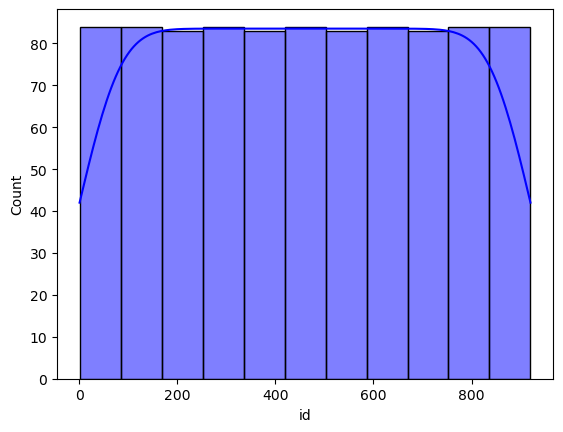

In [23]:
sns.histplot(data=df, x='id', kde=True, color='blue')

**Answer** \#We see a virtually uniform distribution, with almost equal frequency counts across all bins. Actually, no useful information can be extracted from "id" variable, because it is an administrative identifier with no clinical or biological significance.

# Task 2 (2 points)

Let's search for outliers in numerical variables (do not include `'id'`).

First of all, draw boxplots for every one of them on one figure.

Hint: use `plt.subplots`

Describe the plots:



*   Which features do not have any outliers?
*   Which features seem to have the maximum number of outliers?
*   For which features it may be hard to count the number of outliers? Why?





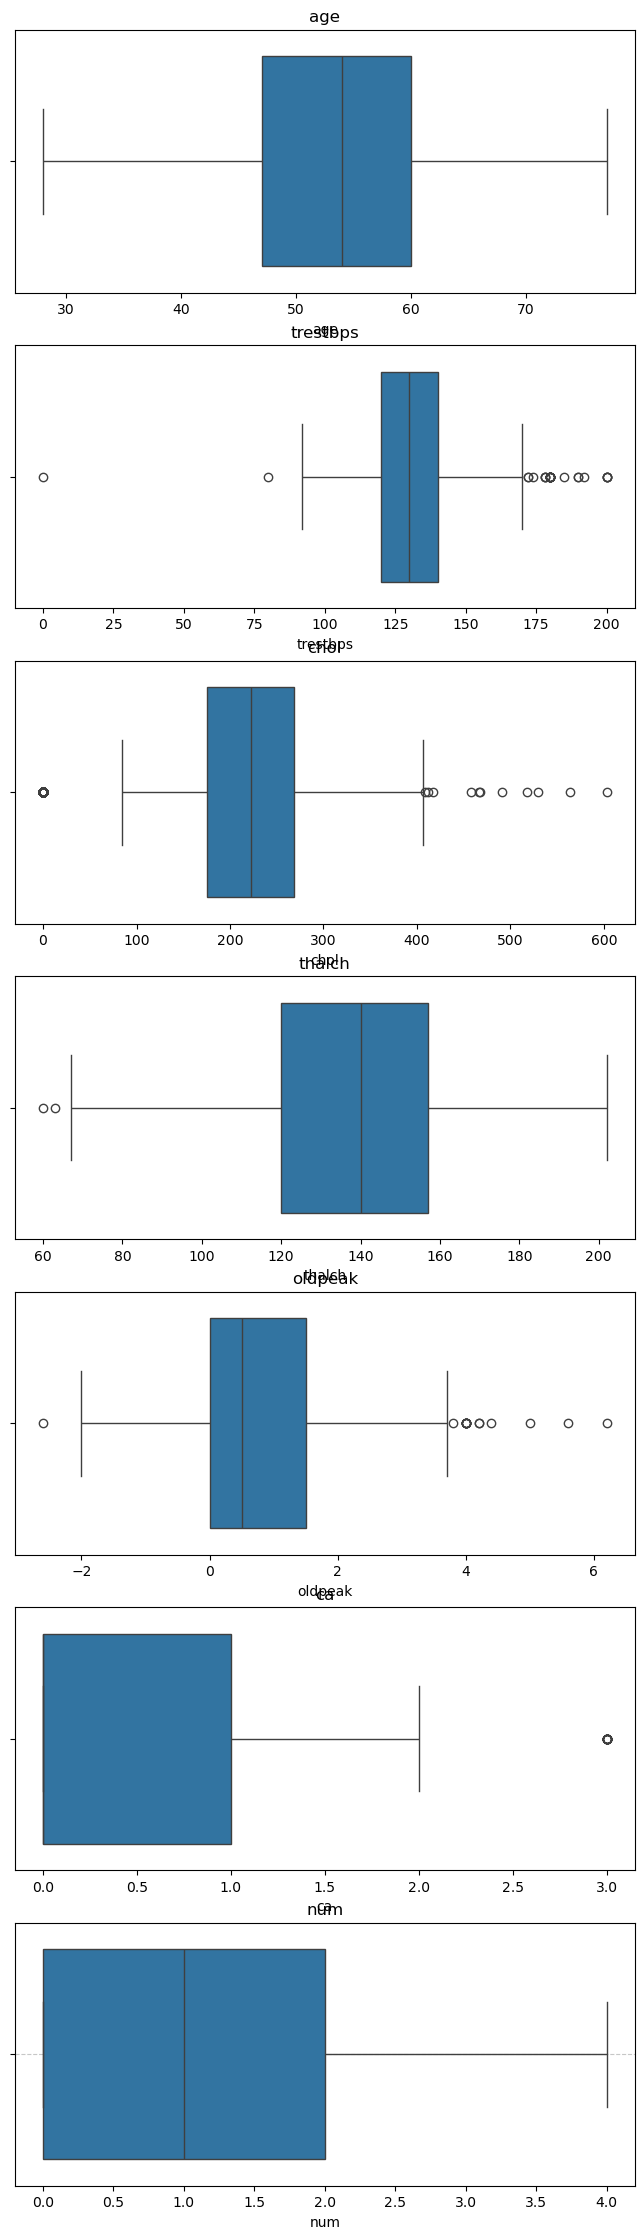

In [133]:
numerical_vars = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(8, 4*len(numerical_vars)))
axes = axes.flatten()
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(var)
axes[i].grid(axis='y', linestyle='--', alpha=0.7)

**Answer** \#1) Age and Num don't have outliers. 
2) Chol, Trestbps, Oldpeak -- these variables have the highest number of outliers. 
3) For CA and Thalch it is hard to count the number of outliers since some points may be overlapping, the distribution is skewed etc. 

Use the $1.5IQR$ approach and count the number of outliers for each column.

In [120]:
def count_outliers_iqr(df):
    outlier_counts = {}
    
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    
    return outlier_counts

In [121]:
outlier_counts = count_outliers_iqr(df)
print("Number of outliers per column:")
print(outlier_counts)

Number of outliers per column:
{'id': 0, 'age': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16, 'ca': 20, 'num': 0}


For the feature with most outliers, draw the histogram and depict the bounds. Do the bounds seem too tight or too wide? Is deleting all outliers for this feature a good idea?

In [123]:
max_feature = max(outlier_counts, key=outlier_counts.get)
print("Feature with most outliers:", max_feature)

Feature with most outliers: chol


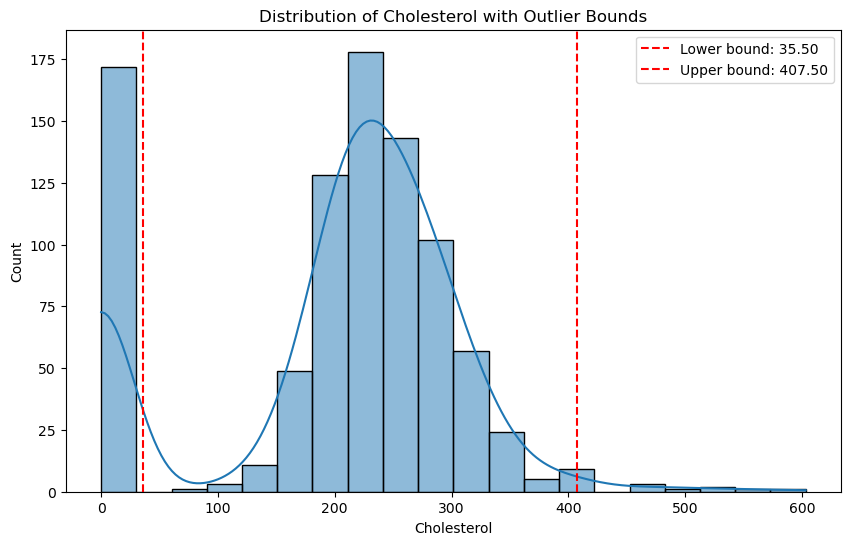

In [134]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], bins=20, kde=True)
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.title('Distribution of Cholesterol with Outlier Bounds')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend()
plt.show()

**Answer** \#The bounds appear too tight for cholesterol. However, deleting outliers is not a very good idea, since such decision would eliminate valuable data points that are likely important for predicting heart disease.

# Task 3 (2 points)

Find the group (or groups) of people that will be deleted, if we delete all the outliers for the feature with the most outliers from the previous task.

In [125]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3-Q1
LB = Q1 - 1.5 *IQR
UB = Q3 + 1.5 *IQR
df_outliers = df[(df['chol'] < LB) | (df['chol'] > UB)]

df_outliers

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
48,49,65,Female,Cleveland,non-anginal,140.0,417.0,True,lv hypertrophy,157.0,False,0.8,upsloping,1.0,normal,0
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0
181,182,56,Female,Cleveland,asymptomatic,134.0,409.0,False,lv hypertrophy,150.0,True,1.9,flat,2.0,reversable defect,2
373,374,44,Male,Hungary,asymptomatic,150.0,412.0,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,NaN,normal,127.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,820,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,840,56,Male,VA Long Beach,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


**Answer** \#Patients with extremely high cholesterol and unusually low cholesterol will be deleted. 

# Task 4 (2 points)

Check the proportion of missing values in the dataset. What approach can be used to tackle the problem for every variable?

In [135]:
missing_summary = pd.DataFrame({
    'Missing_Number': df.isna().sum(),
    'Missing_%': round(df.isna().mean() * 100, 2)
})
print(missing_summary)

          Missing_Number  Missing_%
id                     0       0.00
age                    0       0.00
sex                    0       0.00
dataset                0       0.00
cp                     0       0.00
trestbps              59       6.41
chol                  30       3.26
fbs                   90       9.78
restecg                2       0.22
thalch                55       5.98
exang                 55       5.98
oldpeak               62       6.74
slope                309      33.59
ca                   611      66.41
thal                 486      52.83
num                    0       0.00


**Answer** \#I guess we can use median values to tackle the problem for every variable. 

Fill the missing values, for categorical features create new category `'NOT GIVEN'`

In [136]:
fill_dict = {}

cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in cat_cols:
    fill_dict[col] = 'NOT GIVEN'
    
for col in num_cols:
    fill_dict[col] = df[col].median()


df_filled = df.fillna(fill_dict)

print(df_filled)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina     130.0  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic     130.0  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

# Task 5 (2 points)

Convert every numerical variable into z-scores:

In [77]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [128]:
from scipy import stats
from scipy.stats import zscore

In [137]:
numerical_vars = ['chol', 'thalch', 'oldpeak', 'trestbps', 'age', 'ca', 'num']
df_clean = df.dropna(subset=numerical_vars) 
df_z = df_clean.copy()
df_z[numerical_vars] = df_z[numerical_vars].apply(zscore)

In [138]:
z_values = df_z[numerical_vars]
num_vars = z_values.max(), z_values.min()
num_vars

(chol        5.192723
 thalch      2.301130
 oldpeak     4.465997
 trestbps    3.870035
 age         2.493944
 ca          2.483193
 num         2.483163
 dtype: float64,
 chol       -3.888047
 thalch     -3.365048
 oldpeak    -1.600466
 trestbps   -2.134570
 age        -2.858135
 ca         -0.725856
 num        -0.774831
 dtype: float64)

Find the most extreme value in the dataset: in what column is it in?

In [140]:
z_values = df_z[numerical_vars]
absolute_z_values = z_values.abs()
max_z = absolute_z_values.max().max()
max_col = absolute_z_values.max().idxmax()
max_z_row = absolute_z_values.max(axis=1).idxmax()

print(f"Most extreme value is in column: {max_col}")
print(f"Z-score value: {max_z}")

Most extreme value is in column: chol
Z-score value: 5.19272297941604


**Answer** \#The most extreme value is in the column "chol".

Draw the distributions on one plot. Adjust the visible area of the histogram in such way, that the bar for the most extreme value is visible. It is ok to cut  very high bars.

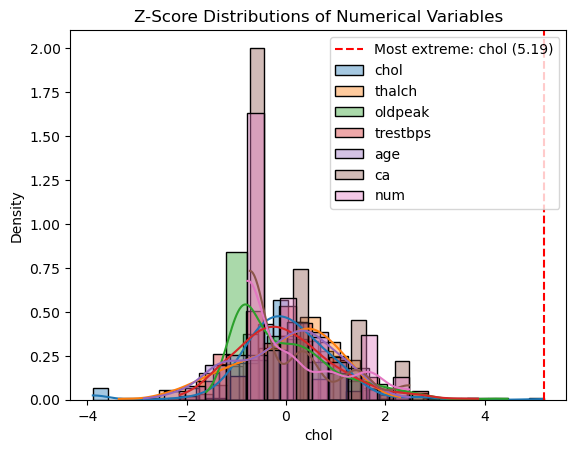

In [142]:
for col in numerical_vars:
    sns.histplot(df_z[col], kde=True, stat='density', alpha=0.4, label=col)

plt.axvline(x=df_z.loc[max_z_row, max_col], color='red', linestyle='--', 
           label=f'Most extreme: {max_col} ({df_z.loc[max_z_row, max_col]:.2f})')

plt.title('Z-Score Distributions of Numerical Variables')
plt.legend()